In [1]:
import game, policy, config
import torch
import numpy as np
from player import *
import glob
import matplotlib.pyplot as plt

In [2]:
models = glob.glob('../models/*.pt')

In [3]:
cfg = config.Config()
cfg.c_impact = 5
cfg.mcts_playout = 800

In [4]:
torch.device('cuda:0')

device(type='cuda', index=0)

In [5]:
g = game.Game()

In [6]:
p1 = ModelPlayer(policy.Model(cfg, file_path=models[-1]))
p2 = ModelPlayer(policy.Model(cfg, file_path=models[-2]))

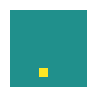

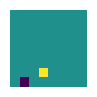

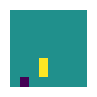

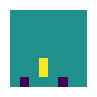

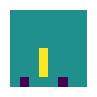

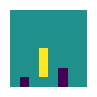

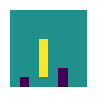

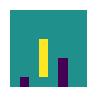

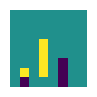

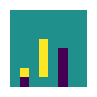

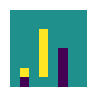

In [7]:
g = game.Game()
i = 0
players = [p1, p2]
while not g.is_finished():
    act = players[i & 1].get_action(g)
    _, wdl = players[i & 1].model.policy_function(g.position)
    g.commit_action(act)
    fig = plt.figure(figsize=(1, 1))
    plt.imshow(g.position.board, vmin=-1, vmax=1)
    plt.axis('off')
    display(fig)
    plt.close()
    i += 1

In [8]:
g.position.board

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0., -1.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  0., -1.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0., -1.,  0.,  0.]])

In [9]:
from utils import *

In [10]:
play_match(p1, p2, 100, False)

100%|██████████| 100/100 [00:07<00:00, 14.05it/s]


[0, 54, 46]

In [11]:
rp = RandomPlayer()

In [12]:
play_match(p1, rp, 100)

100%|██████████| 100/100 [00:05<00:00, 17.55it/s]


[0, 98, 2]

In [13]:
play_match(p2, rp, 100)

100%|██████████| 100/100 [00:05<00:00, 17.79it/s]


[1, 95, 4]

In [14]:
g = game.Game()
for a in [0, 8, 1, 9, 2, 10, 63, 11]:
    g.commit_action(a)

In [15]:
tree = MCTS(cfg)
tree.run(g, p2.model.policy_function)

(array([0.        , 0.        , 0.        , 0.00375469, 0.00375469,
        0.00375469, 0.00375469, 0.00375469, 0.        , 0.        ,
        0.        , 0.        , 0.08135169, 0.00375469, 0.00375469,
        0.00375469, 0.00375469, 0.00375469, 0.00375469, 0.00375469,
        0.00375469, 0.00375469, 0.00375469, 0.00375469, 0.00375469,
        0.00375469, 0.00375469, 0.00375469, 0.00375469, 0.00375469,
        0.00375469, 0.00375469, 0.00375469, 0.00375469, 0.00375469,
        0.00375469, 0.00375469, 0.00375469, 0.00375469, 0.00375469,
        0.00375469, 0.00375469, 0.00375469, 0.00375469, 0.00375469,
        0.00375469, 0.00375469, 0.00375469, 0.00375469, 0.00375469,
        0.00375469, 0.00375469, 0.00375469, 0.00375469, 0.00375469,
        0.71589487, 0.00375469, 0.00375469, 0.00375469, 0.00375469,
        0.00375469, 0.00375469, 0.00375469, 0.        ]),
 array([0.0075, 0.105 , 0.8875]))

In [16]:
p2.model.policy_function(g.position)

(array([2.89326836e-05, 2.00843824e-05, 6.82559084e-06, 9.91402976e-06,
        3.98845550e-05, 8.84559904e-06, 1.36130175e-05, 7.35790309e-06,
        6.82559084e-06, 6.82559084e-06, 6.82559084e-06, 6.82559084e-06,
        6.82559084e-06, 1.03346310e-05, 2.11569477e-05, 7.26121789e-06,
        7.96344193e-06, 1.10624671e-04, 2.08137899e-05, 4.70304622e-05,
        2.46649724e-05, 2.49599165e-04, 1.70278472e-05, 6.82559084e-06,
        8.77728053e-06, 1.05578583e-05, 6.82559084e-06, 6.82559084e-06,
        6.82559084e-06, 1.38774467e-05, 1.36797944e-05, 6.82559084e-06,
        6.82559084e-06, 9.50847698e-06, 6.82559084e-06, 6.82559084e-06,
        2.26403383e-04, 6.82559084e-06, 3.58303805e-05, 2.12680497e-05,
        6.82559084e-06, 1.13910373e-05, 1.81105843e-05, 4.33894274e-05,
        8.25492971e-05, 7.56817008e-06, 6.82559084e-06, 6.82559084e-06,
        6.82559084e-06, 6.82559084e-06, 1.25584102e-05, 6.82559084e-06,
        1.27626608e-05, 2.45394695e-05, 6.82559084e-06, 9.985600